<a href="https://colab.research.google.com/github/sergienko4/deep-learing/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Ex.1 - A single neuron

Submitted by: [... **your name and ID** ...]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

In [2]:
def gradient_descent (X, Y, alpha, T):
    n,d = X.shape
    w = np.zeros(d) # init w 
    J = np.zeros(T) 

    for t in range(T):
                
        Z = X.dot(w) 
        Yhat = 1 / (1+np.exp(-Z))
        dw = np.dot(X.T,Yhat-Y) 
        w = w - alpha * dw
        loss = -Y*np.log(Yhat) - (1-Y)*np.log(1-Yhat)
        J[t] = np.sum(loss)        
        
    return w, J

In [3]:
def get_y_hat_prediction(x, w ):
    z = x.dot(w) 
    Yhat = 1 / (1+np.exp(-z))
    return  np.round(Yhat).astype(int)

In [4]:
def get_prediction_evaluation(y,prediction_y_hat):
    count_ok = 0
    count_bad = 0
    for i in range(len(prediction_y_hat)):
        if(prediction_y_hat[i]==Y[i]):
            count_ok =count_ok+1
        else:
            count_bad=count_bad+1
    return count_ok, count_bad

In [5]:
def print_result(currect, wrong):
    percentage = currect/(wrong + currect)
    print('correct prediction:', currect ,'percentage:',percentage)
    print('wrong prediction:', wrong )

## 1. Trivial 2D example

- Train our model (the single neuron) on the following dataset.

- Plot the learning curve of the loss function `J` to verify that it has converged.

- Visualize the results (as a scatter plot of the dataset on-top of the descision plane).

- Calculate the accuracy of the model: the percentage of the samples that was classified correctly $^*$

($^*$ if y_hat>0.5 and y=1 then that sample was classified correctly and vice versa)



X.shape = (200, 2)
Y.shape = (200,)


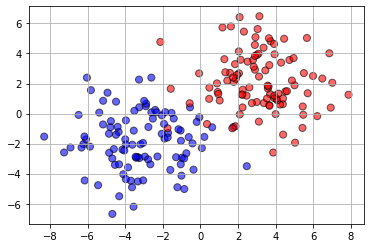

In [6]:
centers = [[-3,-2],[3, 2]]
X, Y = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=2)

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

plt.scatter(x=X[:,0],y=X[:,1],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.grid()
plt.show()

In [7]:
t =100
alfa = 0.001

In [8]:

w,js=gradient_descent(X,Y,alfa,t) 

# js_arr=np.array(js)
j_min=js.min()
print(w,j_min)

[1.22299456 1.06834514] 13.718892148899311


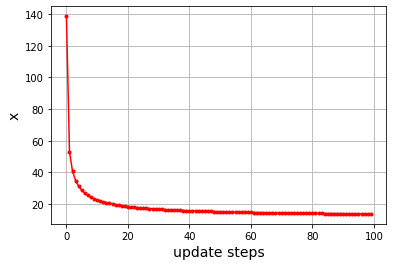

In [9]:
plt.plot(js,'.-r')
plt.xlabel('update steps',fontsize=14)
plt.ylabel('x',fontsize=14)
plt.grid()

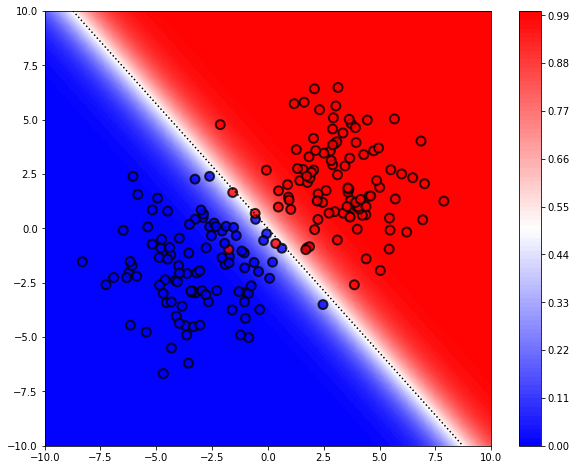

In [10]:
w1, w2 = w
x1_set = np.linspace(-10, 10, num=50)
x2_set = np.linspace(-10, 10, num=50)
x1,x2 = np.meshgrid(x1_set, x2_set)
z = w1*x1 + w2*x2
g = 1/(1+np.exp(-z)) # sigmoid 
        
plt.figure(figsize=(10,8))
plt.contourf(x1_set,x2_set,g,levels=100, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()
plt.contour(x1_set,x2_set,g, levels=[0.5], colors='black',linestyles=':')
plt.scatter(x=X[:,0], y=X[:,1], s=80, c=Y, cmap='bwr', alpha=0.8, edgecolor='k',linewidth=2)
plt.show()

In [11]:
prediction_y_hat = get_y_hat_prediction(X,w)
ok, wrong = get_prediction_evaluation(Y,prediction_y_hat)

print_result(ok,wrong)



correct prediction: 196 percentage: 0.98
wrong prediction: 4


## 2. Add some bias

In order to train the model on the next dataset, you will need to add a bias term to the model (why?). 

You should do so, without changing the `gradient_descent` function.


X.shape = (200, 2)
Y.shape = (200,)


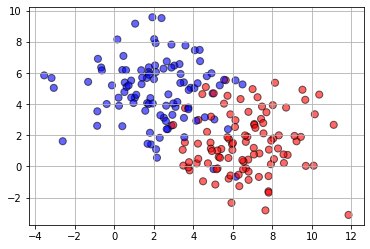

In [12]:
centers = [[2,5],[7, 2]]
X, Y = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=2)

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

plt.scatter(X[:,0],X[:,1],s=50,c=Y,cmap=plt.cm.bwr,edgecolor='k',alpha=0.6)
plt.grid()
plt.show()

As before, 

- Train our model (the single neuron) on the following dataset.

- Plot the learning curve of the loss function `J` to verify that it has converged.

- Visualize the results (as a scatter plot of the dataset on-top of the descision plane).

- Calculate the accuracy of the model: the percentage of the samples that was classified correctly.


In [13]:
new_x = X
one = np.ones((X.shape[0],1),dtype=X.dtype)
new_x =np.append(new_x,one, axis=1)


In [14]:
###  your code goes here...  (you can add more code cells if needed) ###
w,js=gradient_descent(new_x,Y,alfa,t) 

# js_arr=np.array(js)
j_min=js.min()
print(w,j_min)

[ 0.82794359 -0.96557307 -0.44550302] 42.7296511610546


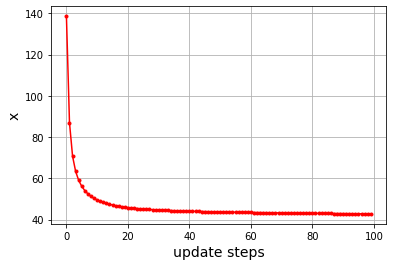

In [15]:
plt.plot(js,'.-r')
plt.xlabel('update steps',fontsize=14)
plt.ylabel('x',fontsize=14)
plt.grid()

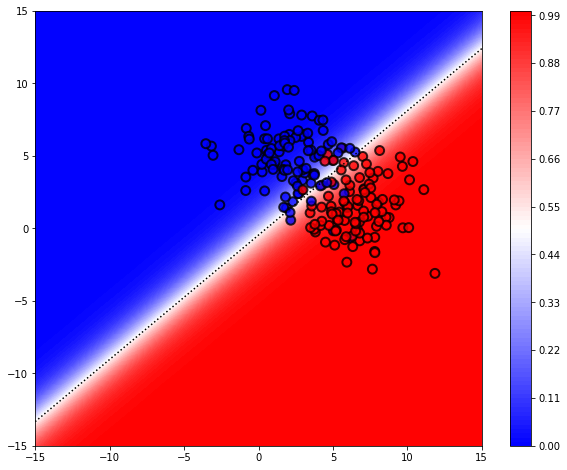

In [16]:
w1, w2, w3 = w
x1_set = np.linspace(-15, 15, num=50)
x2_set = np.linspace(-15, 15, num=50)
x1,x2 = np.meshgrid(x1_set, x2_set)
z = w1*x1 + w2*x2 +1*w3
g = 1/(1+np.exp(-z)) # sigmoid 
        
plt.figure(figsize=(10,8))
plt.contourf(x1_set,x2_set,g,levels=100, cmap='bwr', vmin=0, vmax=1)
plt.colorbar()
plt.contour(x1_set,x2_set,g, levels=[0.5], colors='black',linestyles=':')
plt.scatter(x=new_x[:,0], y=new_x[:,1], s=80, c=Y, cmap='bwr', alpha=0.8, edgecolor='k',linewidth=2)
plt.show()

In [17]:
prediction_y_hat = get_y_hat_prediction(new_x,w)
ok, wrong = get_prediction_evaluation(Y,prediction_y_hat)
print_result(ok,wrong)


correct prediction: 184 percentage: 0.92
wrong prediction: 16


## 3. Let's go to higher dimension: 784-D

To push the limit of this single neuron, let's see if it can handle some real data. 

We will use a subset of the MNIST dataset (images of handwritten digits). 

In this example, we will trim the dataset to use only the samples of the '0' and '1' digits:

11501568/11490434 [==============================] - 0s 0us/step
X.shape = (2115, 28, 28)
Y.shape = (2115,)


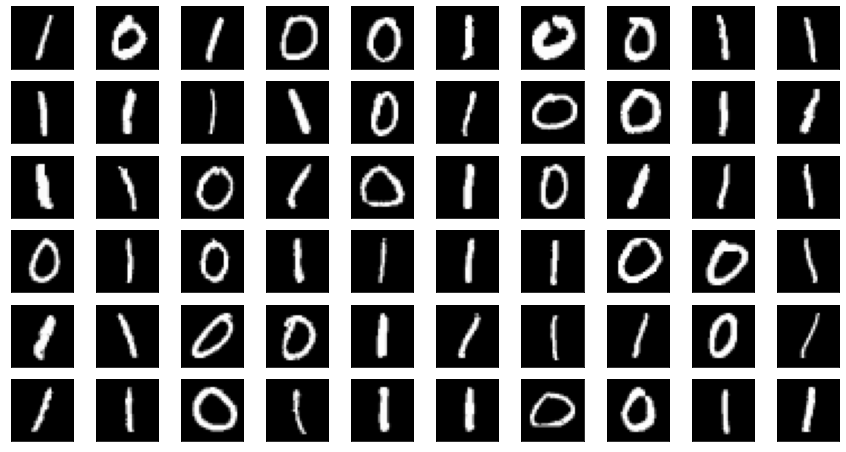

In [18]:
from tensorflow.keras.datasets import mnist
 
_, (X, Y) = mnist.load_data()
X = X.astype('float32') / 255.0
Y = Y.astype('float32')

ii = Y<2  # take only the samples with Y=0 or Y=1
X = X[ii]
Y = Y[ii]

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

# let's plot some examples
plt.figure(figsize=(15,8))
for i in range(60):
    plt.subplot(6,10,i+1)
    plt.imshow(X[i,:,:], cmap='gray')
    plt.xticks([]), plt.yticks([])

- Train our model (the single neuron) on this dataset.

- Plot the learning curve of the loss function `J` to verify that it has converged.

- Calculate the accuracy of the model: the percentage of the samples that was classified correctly $^*$

- Plot the values of final weights vector (784-D)

- Reshape the weights vector as a 28x28 image and use `plt.imshow` to visualize it. Use `cmap='bwr'` and add a colorbar (you can adjust the values using `vmin` and `vmax` to make sure it's symetric around zero). 

- Try to explain in a few words (english/hebrew) this last result - how is this neuron solving the problem?

Your answer: 
 

In [19]:
new_x = []
for r in X:
  vector = np.array(r.flatten())
  new_x.append(vector)
  
new_x=np.array(new_x)

In [20]:
w,js=gradient_descent(new_x,Y,alfa,t) 

# js_arr=np.array(js)
j_min=js.min()
# print(w,j_min)

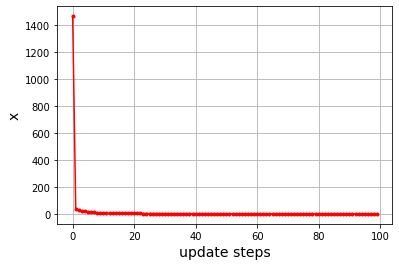

In [21]:
plt.plot(js,'.-r')
plt.xlabel('update steps',fontsize=14)
plt.ylabel('x',fontsize=14)
plt.grid()

In [22]:
prediction_y_hat = get_y_hat_prediction(new_x,w)
ok, wrong = get_prediction_evaluation(Y,prediction_y_hat)

print_result(ok,wrong)

correct prediction: 2115 percentage: 1.0
wrong prediction: 0


The image is the reason why this model predicts correctly 100% of the time.
As you can see, digit 1 and 0 do not share an area.


## Good Luck!

- please submit only the `.ipynb` file, after a full run of your code.